# Data Analytics II: TELCO Project

In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns
from scipy import stats
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls
import pylab as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn import metrics
%matplotlib inline

In [2]:
#First read in the csv File to a data frame for analysis
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## A.) Analyze the Data

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#### Senior Citizen column is responded with 0s and 1s while other yes/no columns are utilizing words (churning, paperless billing) 
#### In multiple lines column - the no response varies between "no" and "no phone service"

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

#### Monthly charges appears as an object and and should be reclassified as float64

In [5]:
#Determine whether and customers/lines of data are duplicated through error
df[df['customerID'].duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


#### The lack of duplicated events seems to indicate accurate recording for the most part and a trustworthy data set

In [6]:
df[df['MonthlyCharges'].isnull()]
df[df['PaymentMethod'].isnull()]
df[df['Churn'].isnull()]
df[df['customerID'].isnull()]
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### In Summary:

Problem 1:  Senior Citizen column utilizes 0s and 1s while other yes/no columns are utilizing words (gender, partner, dependents, phone service, churn, paperless billing) 

Problem 2: In "multiple lines" column - the no response varies between "no" and "no phone service"

Problem 3: Total charges appears as an object and and should be reclassified as float64

Problem 4: Variable Headers have inconsistent formatting

Problem 5: Payment Method and Internet Services Variables must be uncomplicated to reveal only one piece of information

Problem 6: NaN values in Total Charges

## B.) Clean the DataSet

#### Problem 1:  Senior Citizen column utilizes 0s and 1s while other yes/no columns are utilizing words (gender, partner, dependents, phone service, churn, paperless billing) 
#### Solution 1: Assign 0s to No response and 1s to Yes Response in above columns 

In [8]:
#First create a copy data set: 
df = df.copy()
#For each Variable, I use the replace function to assign numerical values of Zero and One to the Yes/No response. This is to 
#facilitate further analysis on these variables 
df.gender.replace(('Female', 'Male'), (1,0), inplace=True)
df['Partner'].replace(('Yes', 'No'), (1,0), inplace=True)
df['Dependents'].replace(('Yes', 'No'), (1,0), inplace=True)
df['PhoneService'].replace(('Yes', 'No'), (1,0), inplace=True)
df['PaperlessBilling'].replace(('Yes', 'No'), (1,0), inplace=True)
df['Churn'].replace(('Yes', 'No'), (1,0), inplace=True)

In [9]:
#The following validates all changes made to the dataset 
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,9305-CDSKC,1,0,0,0,8,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.5,1
6,1452-KIOVK,0,0,0,1,22,1,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,1,0,0,0,10,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.9,0
8,7892-POOKP,1,0,1,0,28,1,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,6388-TABGU,0,0,0,1,62,1,No,DSL,Yes,...,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0


##### Problem 2: In "multiple lines" column - the no response varies between "no" and "no phone service", other columns have similar issues
##### Solution 2: For all values "yes" in each column, replace with 1, all other responses, replace with 0

In [10]:
#Use the eq and mul functions in python to replace Yes with 1, and all other values with 0
df['MultipleLines'] = df['MultipleLines'].eq('Yes').mul(1)
df['OnlineSecurity'] = df['OnlineSecurity'].eq('Yes').mul(1)
df['OnlineBackup'] = df['OnlineBackup'].eq('Yes').mul(1)
df['DeviceProtection'] = df['DeviceProtection'].eq('Yes').mul(1)
df['TechSupport'] = df['TechSupport'].eq('Yes').mul(1)
df['StreamingTV'] = df['StreamingTV'].eq('Yes').mul(1)
df['StreamingMovies'] = df['StreamingMovies'].eq('Yes').mul(1)

In [11]:
#Validate the success of the operation with the following code
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,9305-CDSKC,1,0,0,0,8,1,1,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,1
6,1452-KIOVK,0,0,0,1,22,1,1,Fiber optic,0,...,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,1,0,0,0,10,0,0,DSL,1,...,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.9,0
8,7892-POOKP,1,0,1,0,28,1,1,Fiber optic,0,...,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,6388-TABGU,0,0,0,1,62,1,0,DSL,1,...,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


#### Problem 3: Total charges appears as an object and and should be reclassified as float64
#### Solution 3: Use astype function to reasign objects to int64 and float64

In [12]:
#This code allows the user to display more of the df without truncation
pd.set_option('display.max_rows', 1000)

In [13]:
#I first separated the column and converted it into a Pandas Series
new_str = df['TotalCharges']
new_str2 = pd.Series(new_str)

In [14]:
#I then changed the format of the strings into numeric formats
my_series = pd.to_numeric(new_str2, errors='coerce')
#This code necessitated the coersion of errors due to the empty values - these were then replaced with NaN
my_series

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
5        820.50
6       1949.40
7        301.90
8       3046.05
9       3487.95
10       587.45
11       326.80
12      5681.10
13      5036.30
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19      1862.90
20        39.65
21       202.25
22        20.15
23      3505.10
24      2970.30
25      1530.60
26      4749.15
27        30.20
28      6369.45
29      1093.10
30      6766.95
31       181.65
32      1874.45
33        20.20
34        45.25
35      7251.70
36       316.90
37      3548.30
38      3549.25
39      1105.40
40       475.70
41      4872.35
42       418.25
43      4861.45
44       981.45
45      3906.70
46        97.00
47       144.15
48      4217.80
49      4254.10
50      3838.75
51      1426.40
52      1752.65
53       633.30
54      4456.35
55      1752.55
56      6311.20
57      7076.35
58       894.30
59      7853.70
60      4707.10
61      5450.70
62      

In [15]:
#I then converted the Pandas Series back into the dataframe for the variable total_charges
df['TotalCharges'] = my_series
#Finally I verify the implicit transformation of the strings to floats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int32
InternetService     7043 non-null object
OnlineSecurity      7043 non-null int32
OnlineBackup        7043 non-null int32
DeviceProtection    7043 non-null int32
TechSupport         7043 non-null int32
StreamingTV         7043 non-null int32
StreamingMovies     7043 non-null int32
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int32(7), int64(8), objec

#### Problem 4: Variable Headers have inconsistent formatting
#### Solution 4: Reasign variables to new header with columns function

In [16]:
df.columns = ['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 
              'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup',
             'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 
             'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'churn']

In [17]:
#verify changes are made
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customer_id          7043 non-null object
gender               7043 non-null int64
senior_citizen       7043 non-null int64
partner              7043 non-null int64
dependents           7043 non-null int64
tenure               7043 non-null int64
phone_service        7043 non-null int64
multiple_lines       7043 non-null int32
internet_service     7043 non-null object
online_security      7043 non-null int32
online_backup        7043 non-null int32
device_protection    7043 non-null int32
tech_support         7043 non-null int32
streaming_tv         7043 non-null int32
streaming_movies     7043 non-null int32
contract             7043 non-null object
paperless_billing    7043 non-null int64
payment_method       7043 non-null object
monthly_charges      7043 non-null float64
total_charges        7032 non-null float64
churn                7043 non-null int64
dtypes: float64(2), int3

#### Problem 5: Payment Method and Internet Services Variables must be uncomplicated to reveal only one piece of information
#### Solution 5: Split the Payment Method Column and Internet Services Column into two each 

In [18]:
# new data frame with split value columns 
new = df["payment_method"].str.split("(", n = 1, expand = True) 
  
# making separate column for payment types
df["payment_type"]= new[0] 
  
#make a new column from the automatic values
df["automatic_payment"]= new[1] 
  
#drop original column 
df.drop(columns =["payment_method"], inplace = True) 

#change the format of the column to 1s for automatic payment and 0s for manual payment
df['automatic_payment'] = df['automatic_payment'].eq('automatic)').mul(1)

In [19]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,monthly_charges,total_charges,churn,payment_type,automatic_payment
0,7590-VHVEG,1,0,1,0,1,0,0,DSL,0,...,0,0,0,Month-to-month,1,29.85,29.85,0,Electronic check,0
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,0,0,0,One year,0,56.95,1889.50,0,Mailed check,0
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,0,0,0,Month-to-month,1,53.85,108.15,1,Mailed check,0
3,7795-CFOCW,0,0,0,0,45,0,0,DSL,1,...,1,0,0,One year,0,42.30,1840.75,0,Bank transfer,1
4,9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,Month-to-month,1,70.70,151.65,1,Electronic check,0
5,9305-CDSKC,1,0,0,0,8,1,1,Fiber optic,0,...,0,1,1,Month-to-month,1,99.65,820.50,1,Electronic check,0
6,1452-KIOVK,0,0,0,1,22,1,1,Fiber optic,0,...,0,1,0,Month-to-month,1,89.10,1949.40,0,Credit card,1
7,6713-OKOMC,1,0,0,0,10,0,0,DSL,1,...,0,0,0,Month-to-month,0,29.75,301.90,0,Mailed check,0
8,7892-POOKP,1,0,1,0,28,1,1,Fiber optic,0,...,1,1,1,Month-to-month,1,104.80,3046.05,1,Electronic check,0
9,6388-TABGU,0,0,0,1,62,1,0,DSL,1,...,0,0,0,One year,0,56.15,3487.95,0,Bank transfer,1


In [20]:
# new data frame is split from the internet_service column
new = df["internet_service"].str.split("DSL", n = 1, expand = True) 
  
#use the dsl values to form a new column 
df["dsl_internet"]= new[1] 

#change the format of the column to 1s for DSL and 0s for all other types
df['dsl_internet'] = df['dsl_internet'].eq('').mul(1)

#replace the values in the internet_service column to show 1s for any internet service and 0s for none
df.internet_service.replace(('DSL', 'Fiber optic', 'No'), (1,1,0), inplace=True)

In [21]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,streaming_tv,streaming_movies,contract,paperless_billing,monthly_charges,total_charges,churn,payment_type,automatic_payment,dsl_internet
0,7590-VHVEG,1,0,1,0,1,0,0,1,0,...,0,0,Month-to-month,1,29.85,29.85,0,Electronic check,0,1
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,0,0,One year,0,56.95,1889.50,0,Mailed check,0,1
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,Month-to-month,1,53.85,108.15,1,Mailed check,0,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,1,...,0,0,One year,0,42.30,1840.75,0,Bank transfer,1,1
4,9237-HQITU,1,0,0,0,2,1,0,1,0,...,0,0,Month-to-month,1,70.70,151.65,1,Electronic check,0,0
5,9305-CDSKC,1,0,0,0,8,1,1,1,0,...,1,1,Month-to-month,1,99.65,820.50,1,Electronic check,0,0
6,1452-KIOVK,0,0,0,1,22,1,1,1,0,...,1,0,Month-to-month,1,89.10,1949.40,0,Credit card,1,0
7,6713-OKOMC,1,0,0,0,10,0,0,1,1,...,0,0,Month-to-month,0,29.75,301.90,0,Mailed check,0,1
8,7892-POOKP,1,0,1,0,28,1,1,1,0,...,1,1,Month-to-month,1,104.80,3046.05,1,Electronic check,0,0
9,6388-TABGU,0,0,0,1,62,1,0,1,1,...,0,0,One year,0,56.15,3487.95,0,Bank transfer,1,1


#### Problem 6: NaN values in Total Charges
#### Solution 6: Replace NaN values with Zero

In [22]:
df.total_charges = df.total_charges.replace(np.nan, 0)

In [23]:
np.where(np.isnan(df.total_charges))

(array([], dtype=int64),)

#### Finally, Save the New DataSet into a CSV file 

In [24]:
df.to_csv('CleanTELCO.csv', index=False)

## C.) Univariate Analysis

#### The best approach to begin seeing the correlation between internet service and automatic payment as possible predictors for tenure, is to see the frequency counts of each variable using univariate analysis 

In [25]:
my_tab = pd.crosstab(df["churn"], columns="count") 
my_tab

col_0,count
churn,
0,5174
1,1869


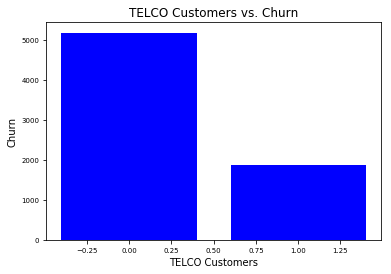

<Figure size 432x288 with 0 Axes>

In [26]:
xvalues = [0, 1]
yvaluecounts = df['churn'].value_counts()

plt.bar(xvalues, yvaluecounts, color='blue')
plt.tick_params(labelsize = 7)
plt.ylabel('Churn')
plt.xlabel('TELCO Customers')
plt.title('TELCO Customers vs. Churn')
plt.show()
fig = plt.figure()
fig.savefig('univariate1.png')

In [27]:
int_tab = pd.crosstab(df["phone_service"], columns="count") 
int_tab

col_0,count
phone_service,
0,682
1,6361


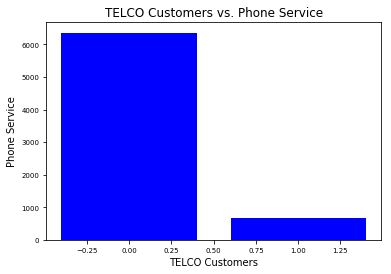

<Figure size 432x288 with 0 Axes>

In [28]:
xvalues = [0, 1]
yvaluecounts = df['phone_service'].value_counts()

plt.bar(xvalues, yvaluecounts, color='blue')
plt.tick_params(labelsize = 7)
plt.ylabel('Phone Service')
plt.xlabel('TELCO Customers')
plt.title('TELCO Customers vs. Phone Service')
plt.show()
fig = plt.figure()
fig.savefig('univariate2.png')

In [29]:
ten_tab = pd.crosstab(df["tenure"], columns="count") 
ten_tab

col_0,count
tenure,
0,11
1,613
2,238
3,200
4,176
5,133
6,110
7,131
8,123


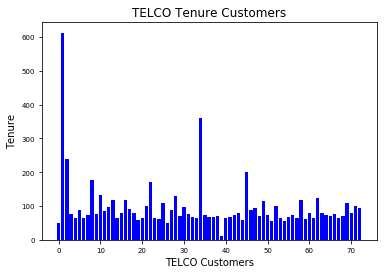

<Figure size 432x288 with 0 Axes>

In [30]:
xvalues = df['tenure'].unique()
yvaluecounts = df['tenure'].value_counts()

plt.bar(xvalues, yvaluecounts, color='blue')
plt.tick_params(labelsize = 7)
plt.ylabel('Tenure')
plt.xlabel('TELCO Customers')
plt.title('TELCO Tenure Customers')
plt.show()
fig = plt.figure()
fig.savefig('univariate3.png')

In [31]:
charges_tab = pd.crosstab(df["monthly_charges"], columns="count") 
charges_tab

col_0,count
monthly_charges,
18.25,1
18.40,1
18.55,1
18.70,2
18.75,1
18.80,7
18.85,5
18.90,2
18.95,6


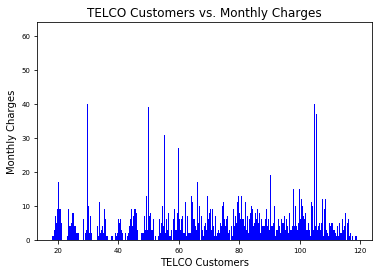

<Figure size 432x288 with 0 Axes>

In [32]:
xvalues = df['monthly_charges'].unique()
yvaluecounts = df['monthly_charges'].value_counts()

plt.bar(xvalues, yvaluecounts, color='blue', align='edge', width=0.1)
plt.tick_params(labelsize = 7)
plt.ylabel('Monthly Charges')
plt.xlabel('TELCO Customers')
plt.title('TELCO Customers vs. Monthly Charges')
plt.show()
fig = plt.figure()
fig.savefig('univariate4.png')

#### Visualizations for univariate analysis

### B.) Bivariate Analysis

#### Utilize correlation analysis to conduct covariance analysis

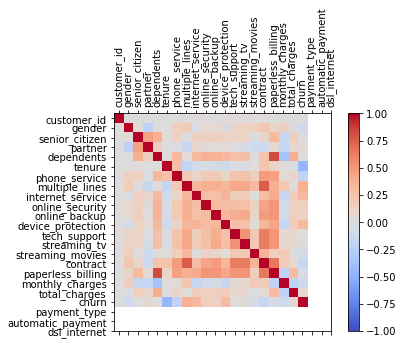

In [33]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

###### It is clear that Tenure is positively correlated with Phone Service, Contract, and negatively correlated with churn

#### C.) Descriptive Analysis 

#### Utilize Linear Regression in order to create a predictive model for tenure likelihood based on phone service and internet service

In [34]:
#First I reshaped the variables paperless billing and total charges in order to be scaled and thus easily compared
X = df['paperless_billing'].values.reshape(-1,1)
y = df['total_charges'].values.reshape(-1,1)

#Then I created training and test variables in order to test the validity of the model later on
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


#I used the training variables to create the Linear Regression Model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#I printed the regression intercept and coefficient to evaluate the Model
print(regressor.intercept_)
print(regressor.coef_)

[1846.35262213]
[[727.18551785]]


In [35]:
#I finally completed the linear regression model with the predict() function and assigned it a name
y_pred = regressor.predict(X_test)

In [36]:
#I then created a dataframe out of the actual values and the predicted values based off of the model in order 
#to compare the two
modl = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
modl

,Actual,Predicted
0,1045.25,1846.352622
1,7049.50,2573.538140
2,923.85,2573.538140
3,20.45,1846.352622
4,4266.40,2573.538140
5,260.90,2573.538140
6,1414.20,1846.352622
7,69.55,2573.538140
8,2234.55,1846.352622
9,3365.40,2573.538140


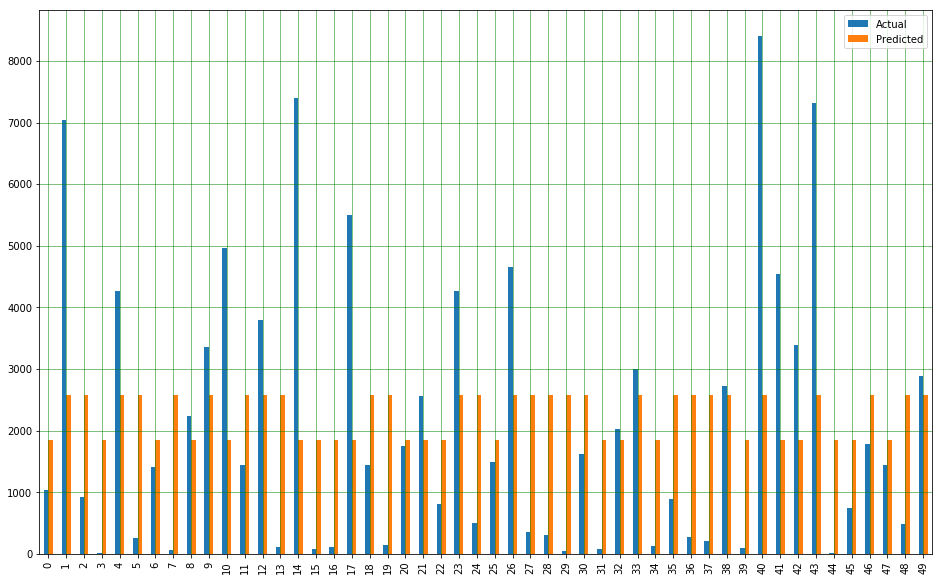

In [37]:
#To evaluate the model, I created a table with actual and predicted values, allowing an evaluator to see 
#the accuracy of the prediction on a portion of the dataset 
modl1 = modl.head(50)
modl1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [38]:
#Finally to confirm the usefulness of the model, I  used a couple metrics such as MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1872.5873454428763
Mean Squared Error: 5085127.292722029
Root Mean Squared Error: 2255.0226811990224


#### In the end, the model has been rendered insufficient as a predictor. Moving forward, I decided to use logistic regression as a predictor, using internet service and phone service as predictors for tenure

In [39]:
# In order to run proper analysis, I decided to bin tenure into three categories. In order to do so, I needed to create
# an array out of the tenure category, cut the variable into sections, and then attach the variable back into the df
new_var = np.array(df['tenure'])
df['tenure'] = pd.cut(new_var, 3, labels=[0,1,2])

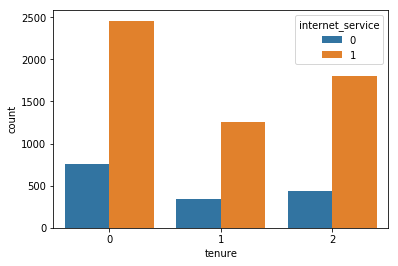

In [40]:
#I evaluate the fluctuation in internet service based on tenure 
sns.countplot(x='tenure', hue='internet_service', data=df)

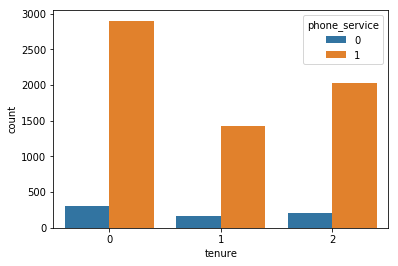

In [41]:
#I also evaluate the fluctuation on phone service based on tenure
sns.countplot(x='tenure',hue='phone_service',data=df)

In [42]:
#I create a new df with only the relevant materials 
df3 = df[['phone_service', 'internet_service', 'automatic_payment', 'churn', 'partner', 'dependents', 'tenure']]

In [43]:
#With the following code, I utilize the phone_service and internet_service variables to predict tenure with a test size
#of 50% of the total data set
X_train, X_test, y_train, y_test = train_test_split(df3.drop('tenure',axis=1), 
                                                    df3['tenure'], test_size=0.50, 
                                                    random_state=101)

In [44]:
#I then develop a logistic regression from the data set and fit a model over the data and show predictions
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

C:\Users\7240\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\7240\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



In [46]:
#In order to evaluate the model, I used the classification report. The f1-score is high, meaning the model is more useful, 
#then not. The support is evenly distributed so the model distribution does not require adjustment
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.64      0.79      0.71      1605
           1       0.00      0.00      0.00       797
           2       0.53      0.74      0.62      1120

   micro avg       0.60      0.60      0.60      3522
   macro avg       0.39      0.51      0.44      3522
weighted avg       0.46      0.60      0.52      3522



C:\Users\7240\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\7240\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\7240\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



#### What is evident from the model is that tenure in the beginning and end of the model can be predicted through logistic regression models of phone service and internet service